# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [174]:
import json
import pandas as pd
pd.set_option('max_columns', None)
file = open('disease_data.json')
data = json.load(file)
df = pd.DataFrame(data['data'])
columnNames = []
for x in data['meta']['view']['columns']:
    columnNames.append(x['fieldName'])
df.columns = columnNames


## Explore the first and second levels of the schema hierarchy

In [175]:
asthmaDf = df.loc[lambda df: df['topic'] == 'Asthma']

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [181]:
asthmaDf['datavalue'] = asthmaDf['datavalue'].astype(float)
asthmaDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.5,6.5,None,None,5.4,7.9,Gender,Male,None,None,None,None,"[None, 40.48501028300046, -88.99771017799969, ...",None,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.7,6.7,None,None,5.8,7.7,Gender,Male,None,None,None,None,"[None, 39.766910452000445, -86.14996019399968,...",None,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,5.6,5.6,None,None,4.7,6.7,Gender,Male,None,None,None,None,"[None, 42.46940091300047, -93.81649055599968, ...",None,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.1,6.1,None,None,5.4,6.9,Gender,Male,None,None,None,None,"[None, 38.34774030000045, -98.20078122699965, ...",None,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.9,6.9,None,None,5.9,8,Gender,Male,None,None,None,None,"[None, 37.645970271000465, -84.77497104799966,...",None,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,14044,BF758BF8-DC9D-483A-9687-C75D1C04D131,14044,1527194524,959778,1527194524,959778,None,2016,2016,WI,Wisconsin,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,NaN,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 44.39319117400049, -89.81637074199966, ...",None,55,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
14050,14045,4AB6FD3F-EB88-460F-82DD-8E42A26DDD29,14045,1527194524,959778,1527194524,959778,None,2016,2016,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,NaN,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 43.23554134300048, -108.10983035299967,...",None,56,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
14051,14046,854D56B2-888A-49E0-8F5B-96A6D4DB5B2A,14046,1527194524,959778,1527194524,959778,None,2016,2016,GU,Guam,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,NaN,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 13.444304, 144.793731, None, False]",None,66,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
140

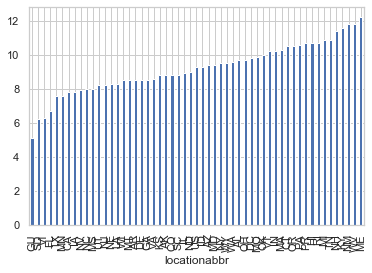

In [235]:
asthmaDf.columns


toPlot = asthmaDf[(asthmaDf['datavaluetypeid'] == 'CRDPREV')
        & (asthmaDf['stratificationcategoryid1'] == 'OVERALL')
        & (asthmaDf['question'] == 'Current asthma prevalence among adults aged >= 18 years')].sort_values('datavalue')
toplot = toPlot.sort_values('locationdesc')
toPlot.set_index('locationabbr')['datavalue'].plot(kind='bar')


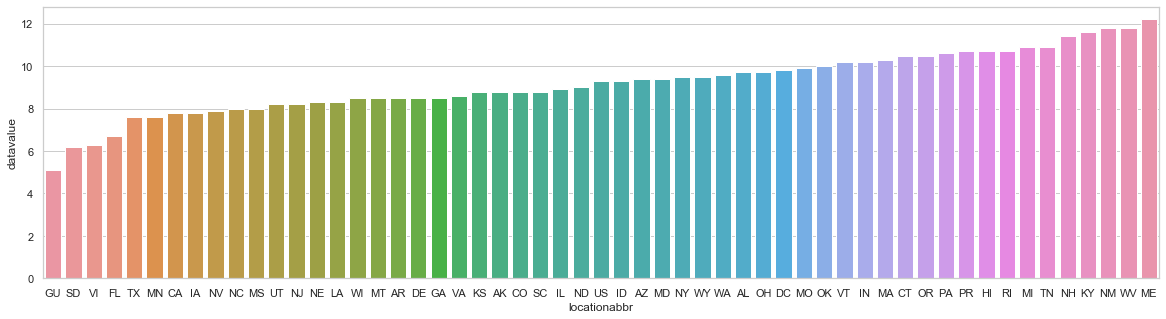

In [237]:
fig,ax = plt.subplots(figsize = (20,5))
sns.barplot(x = toPlot['locationabbr'], y = toPlot['datavalue'])

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!